# 打陳時中的臉

本文是針對5/31陳時中在記者會中出示這個圖卡來突顯「台灣好棒棒」。

![alt text](https://github.com/cgnauh1/5-31-2022/blob/main/card.jpeg?raw=true)

事實上，仔細檢視原始資料，你會發現其實只是自欺欺人而己。

In [ ]:
import seaborn as sns
import pandas as pd
import datetime
from matplotlib import pyplot

我們使用OWID提供的資料。可由 https://ourworldindata.org/coronavirus#explore-the-global-situation 下載

In [2]:
df = pd.read_csv('owid-covid-data.csv')

首先，先將非國家地區資料去除。

In [3]:
loc_list = list(set(df[pd.notnull(df['continent'])]['location'].to_list()))

接下來，我們使用與台灣防疫中心一樣的方式，計算
一，1/1-5/29期間，每日（每十萬人口）全人口七日移動發生率加總後之平均值
二，1/1-5/29期間，每日（每百萬人口）全人口七日移動死亡率加總後之平均值

In [4]:
new_cases_smoothed_per_million = []
new_deaths_smoothed_per_million = []
for l in loc_list:    
    df1 = df[(df['location']==l) & (pd.to_datetime(df['date'])>=pd.Timestamp(2022,1,1))& (pd.to_datetime(df['date'])<=pd.Timestamp(2022,5,29))]
    new_cases_smoothed_per_million.append(df1['new_cases_smoothed_per_million'].mean()/10)
    new_deaths_smoothed_per_million.append(df1['new_deaths_smoothed_per_million'].mean())

將上述兩結果製成表格。

In [5]:
res_df = pd.DataFrame({'location': loc_list, 'new_cases_smoothed_per_million': new_cases_smoothed_per_million, 'new_deaths_smoothed_per_million': new_deaths_smoothed_per_million})
res_df = res_df[pd.notnull(res_df['new_cases_smoothed_per_million']) & pd.notnull(res_df['new_deaths_smoothed_per_million'])]

檢驗一下台灣部份的數據，每日（每十萬人口）全人口七日移動發生率加總後之平均值為45.732837，四捨五入至整數後為46，每日（每百萬人口）全人口七日移動死亡率加總後之平均值為0.239664，四捨五入至小數點後一位為46。與台灣防疫中心數據相符。

In [6]:
res_df[res_df['location']=='Taiwan']

,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million
129,Taiwan,45.732837,0.239664


接下來，列出台灣防疫中心手版中所選的國家，數據大致相符。除了New Zealand與Singapore每日（每十萬人口）全人口七日移動發生率加總後之平均值略有出入（147<->153與124<->111），俱體原因未知。

In [7]:
res_df[res_df['location'].isin(['Taiwan','South Korea','Japan','Hong Kong','Singapore','New Zealand'])]

,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million
30,South Korea,227.968103,2.443383
68,Japan,37.238926,0.642651
89,Hong Kong,106.519138,8.139826
90,Singapore,123.931299,0.684228
129,Taiwan,45.732837,0.239664
157,New Zealand,146.809928,1.342705


依照陳時中部長邏輯，這兩個數字愈小愈好。我們來看看台灣防疫是否真為世界第一？世界是否真的跟不上台灣？

先從每日（每十萬人口）全人口七日移動發生率加總後之平均值開始

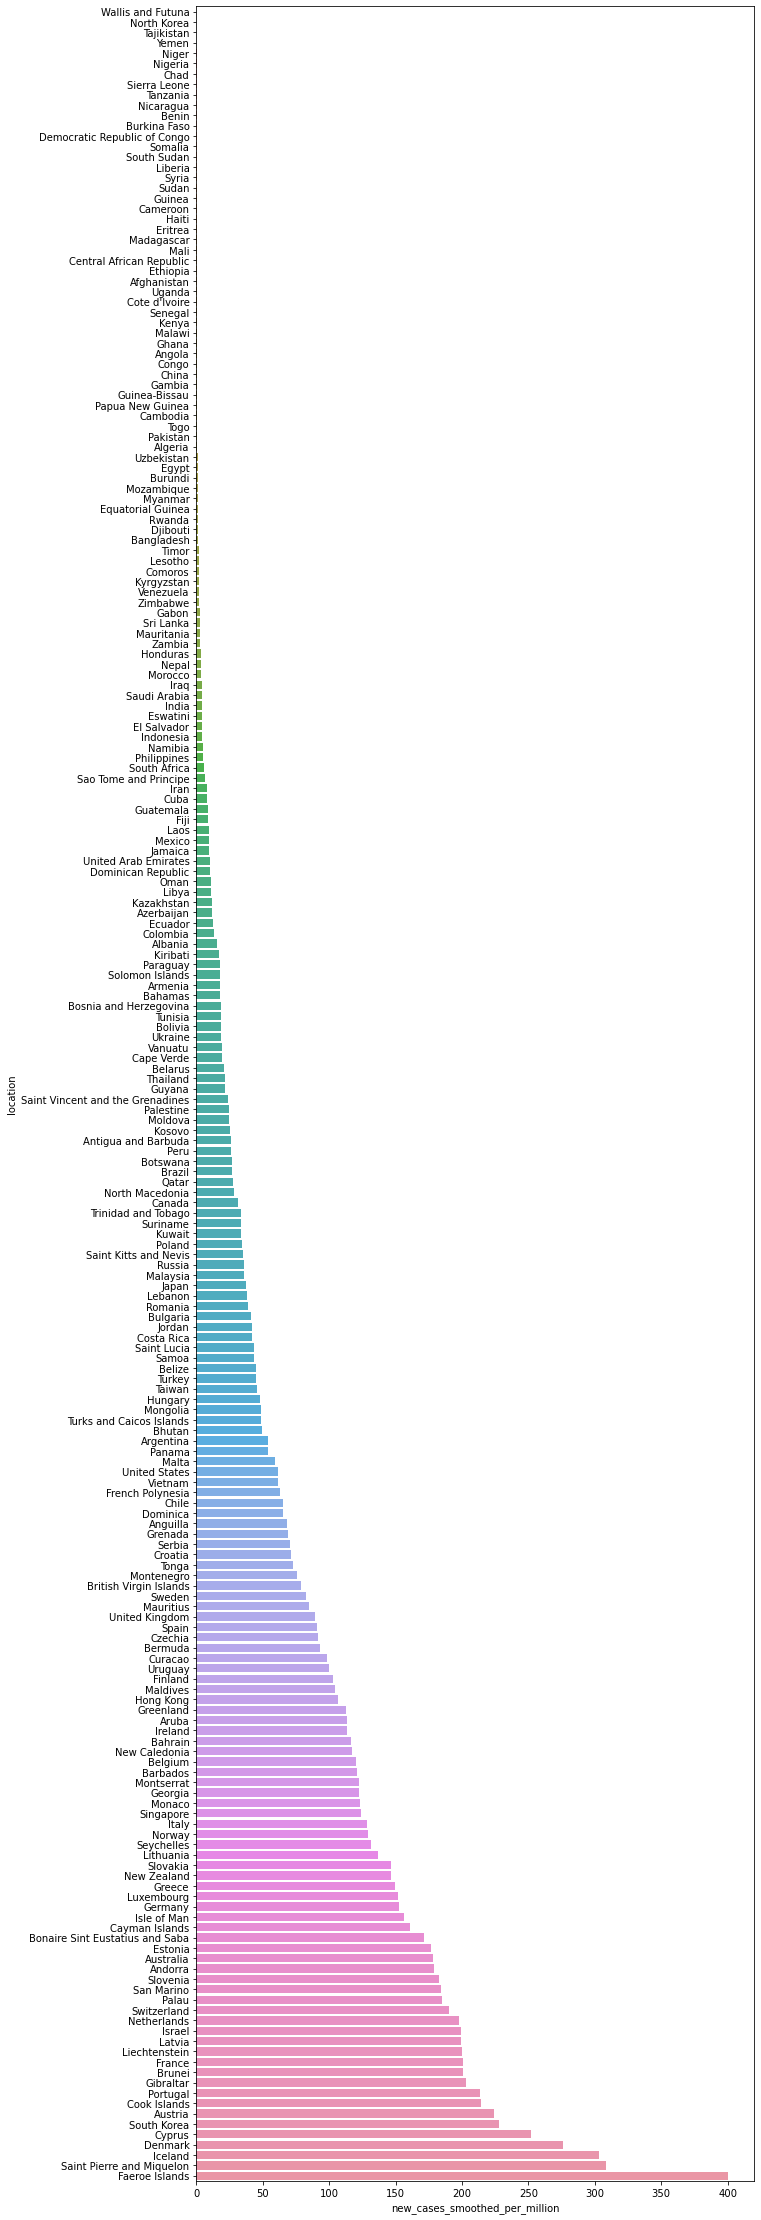

In [8]:
fig, ax = pyplot.subplots(figsize=(10,40))
sns.barplot(ax=ax, x="new_cases_smoothed_per_million", y="location", data=res_df.sort_values(by='new_cases_smoothed_per_million'))
fig.savefig('new_cases_smoothed_per_million.png')

看來還真是不少。這世界有救了。那俱體有哪些國家呢？

In [9]:
tw_record = res_df[res_df['location']=='Taiwan']['new_cases_smoothed_per_million'].to_numpy()[0]
res_df[res_df['new_cases_smoothed_per_million']<tw_record][['location','new_cases_smoothed_per_million']].sort_values(by='new_cases_smoothed_per_million')

,location,new_cases_smoothed_per_million
225,Wallis and Futuna,0.000000
72,North Korea,0.000109
136,Tajikistan,0.020171
120,Yemen,0.037387
10,Niger,0.045926
...,...,...
52,Costa Rica,41.840975
170,Saint Lucia,43.559971
159,Samoa,43.639241
4,Belize,44.680379


In [10]:
res_df[res_df['new_cases_smoothed_per_million']<tw_record]['location'].to_list()

['Togo',
 'Ethiopia',
 'Democratic Republic of Congo',
 'Belize',
 'Niger',
 'Trinidad and Tobago',
 'Jamaica',
 'South Sudan',
 'Bahamas',
 'Eritrea',
 'Cameroon',
 'Sierra Leone',
 'Myanmar',
 'Honduras',
 'Brazil',
 'Romania',
 'North Macedonia',
 'Palestine',
 'Indonesia',
 'Congo',
 'Kuwait',
 'Mali',
 'Malaysia',
 'Liberia',
 'Mozambique',
 'United Arab Emirates',
 'Malawi',
 'El Salvador',
 'Haiti',
 'Cape Verde',
 'Botswana',
 'Saint Kitts and Nevis',
 'Somalia',
 'Vanuatu',
 'Costa Rica',
 'Eswatini',
 'Gambia',
 'Philippines',
 'Saint Vincent and the Grenadines',
 'India',
 'Laos',
 'Iran',
 'Japan',
 'Armenia',
 'North Korea',
 'Guinea',
 'Kenya',
 'Iraq',
 'Guatemala',
 'Kiribati',
 'Oman',
 'Solomon Islands',
 'Ukraine',
 'Colombia',
 'Nepal',
 'Jordan',
 'Benin',
 'Chad',
 'Ghana',
 'Guinea-Bissau',
 'Sao Tome and Principe',
 'Algeria',
 'Central African Republic',
 'Ecuador',
 'Antigua and Barbuda',
 'Libya',
 'Guyana',
 'Comoros',
 'Namibia',
 'Timor',
 'Russia',
 'Yeme

接下來看看陳時中部長引以為豪的「百萬分之0.2」，有哪些國家表現比台灣更好呢？

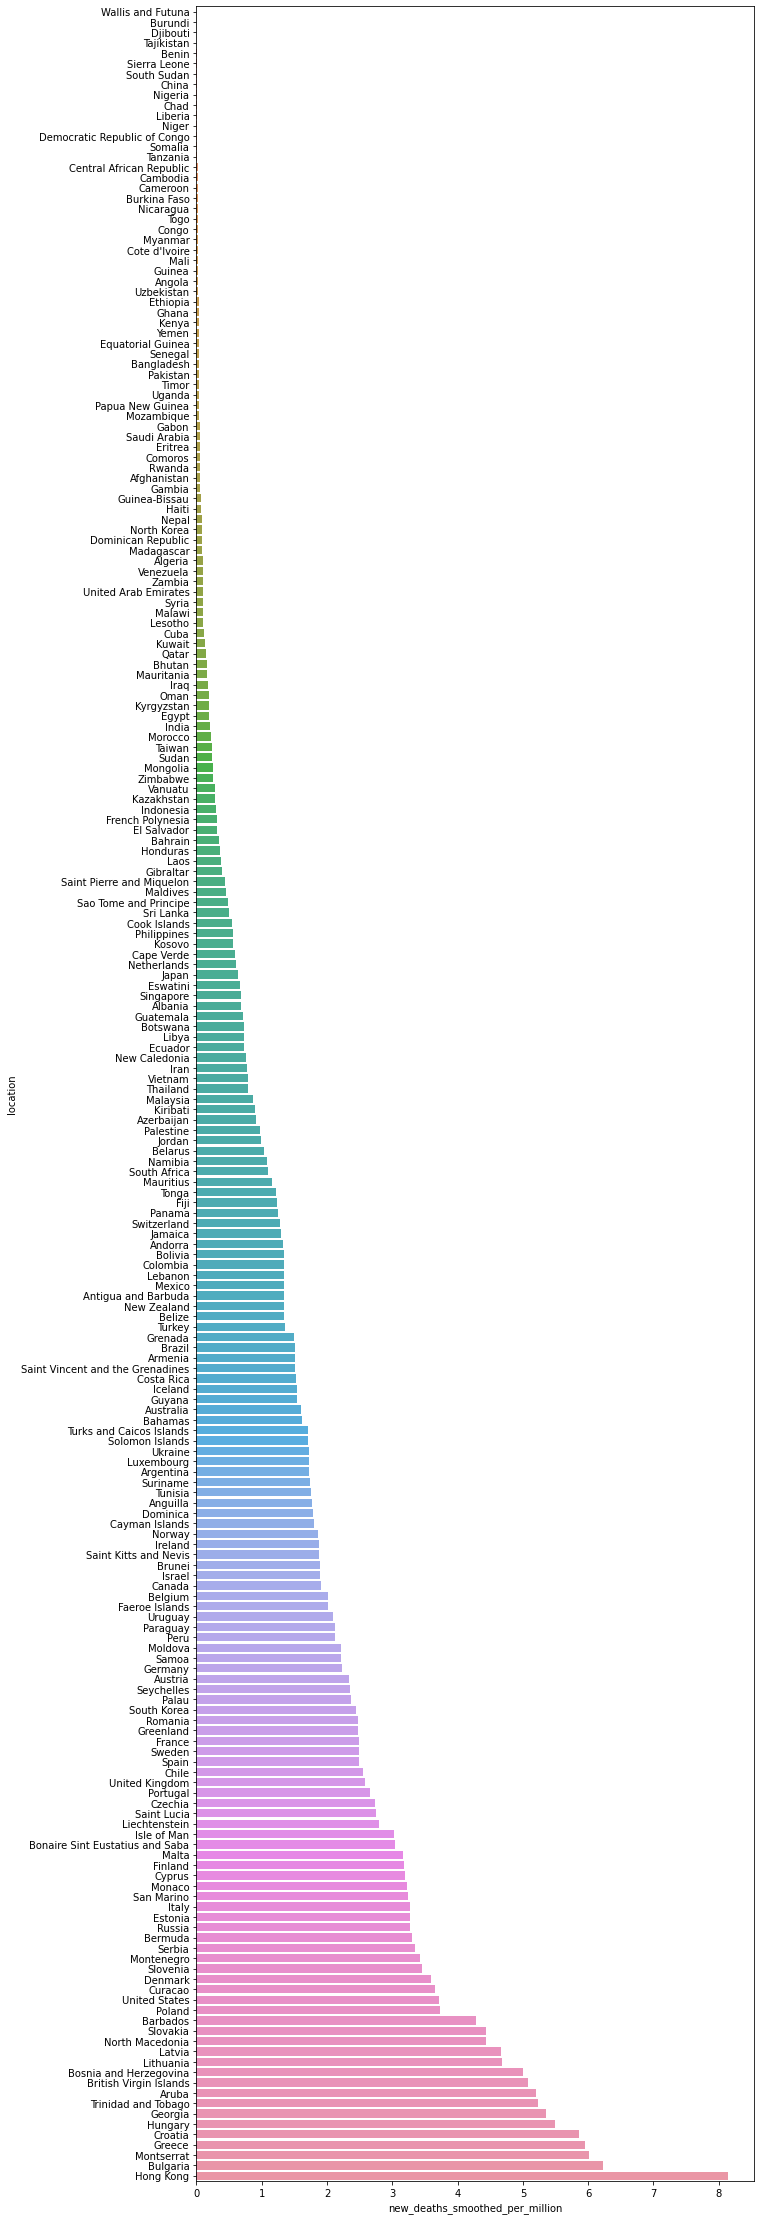

In [12]:
fig, ax = pyplot.subplots(figsize=(10,40))
sns.barplot(ax=ax, x="new_deaths_smoothed_per_million", y="location", data=res_df.sort_values(by='new_deaths_smoothed_per_million'))
fig.savefig('new_deaths_smoothed_per_million.png')

In [13]:
tw_record = res_df[res_df['location']=='Taiwan']['new_deaths_smoothed_per_million'].to_numpy()[0]
res_df[res_df['new_deaths_smoothed_per_million']<tw_record][['location','new_deaths_smoothed_per_million']].sort_values(by='new_deaths_smoothed_per_million')

,location,new_deaths_smoothed_per_million
123,Djibouti,0.000000
216,Burundi,0.000000
225,Wallis and Futuna,0.000000
136,Tajikistan,0.000000
98,Benin,0.001034
...,...,...
85,Oman,0.186584
204,Kyrgyzstan,0.195584
205,Egypt,0.195591
63,India,0.211805


In [14]:
res_df[res_df['new_deaths_smoothed_per_million']<tw_record][['location','new_deaths_smoothed_per_million']].sort_values(by='new_deaths_smoothed_per_million')['location'].to_list()

['Djibouti',
 'Burundi',
 'Wallis and Futuna',
 'Tajikistan',
 'Benin',
 'Sierra Leone',
 'South Sudan',
 'China',
 'Nigeria',
 'Chad',
 'Liberia',
 'Niger',
 'Democratic Republic of Congo',
 'Somalia',
 'Tanzania',
 'Central African Republic',
 'Cambodia',
 'Cameroon',
 'Burkina Faso',
 'Nicaragua',
 'Togo',
 'Congo',
 'Myanmar',
 "Cote d'Ivoire",
 'Mali',
 'Guinea',
 'Angola',
 'Uzbekistan',
 'Ethiopia',
 'Ghana',
 'Kenya',
 'Yemen',
 'Equatorial Guinea',
 'Senegal',
 'Bangladesh',
 'Pakistan',
 'Timor',
 'Uganda',
 'Papua New Guinea',
 'Mozambique',
 'Gabon',
 'Saudi Arabia',
 'Eritrea',
 'Comoros',
 'Rwanda',
 'Afghanistan',
 'Gambia',
 'Guinea-Bissau',
 'Haiti',
 'Nepal',
 'North Korea',
 'Dominican Republic',
 'Madagascar',
 'Algeria',
 'Venezuela',
 'Zambia',
 'United Arab Emirates',
 'Syria',
 'Malawi',
 'Lesotho',
 'Cuba',
 'Kuwait',
 'Qatar',
 'Bhutan',
 'Mauritania',
 'Iraq',
 'Oman',
 'Kyrgyzstan',
 'Egypt',
 'India',
 'Morocco']

看來這些國家的防疫策略真值得我們學習呢。來節錄幾個重點國家

In [15]:
res_df[res_df['location']=='China']

,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million
141,China,0.50496,0.002743


In [16]:
res_df[res_df['location']=='India']

,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million
63,India,4.013036,0.211805


In [17]:
res_df[res_df['location']=='North Korea']

,location,new_cases_smoothed_per_million,new_deaths_smoothed_per_million
72,North Korea,0.000109,0.0827


陳時中部長，您要不要快點派人去取經呢？